# Logistic regression
[Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression) is a classification algorithm. It is based on the sigmoid function

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

where $x \in (-\infty, \infty)$ and $\sigma \in [0, 1]$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print("numpy version: %s"%np.__version__)
print("pandas version: %s"%pd.__version__)

numpy version: 1.23.1
pandas version: 1.4.3


We define the sigmoid function

In [2]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

We compute a sample of the sigmoid function within a predefined interval

In [3]:
x = np.linspace(-10, 10, 100) # start = -10, stop = 10, samples = 100
sigma = sigmoid(x)

Finally we plot the sigmoid function

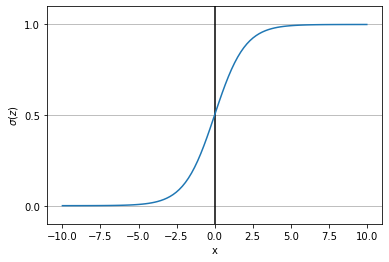

In [4]:
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('x')
plt.ylabel('$\sigma (z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.plot(x, sigma)

The sigmoid is used as the activation function in logistic regression. The difference compared to the perceptron is that the sigmoid is differentiable everywhere while the threshold function, used as the perceptron's activation function, is not. The idea in logistic regression is to use the output of the sigmoid actvation function to determine the class of the input

$$y = \Biggl\{  \begin{matrix} 1 & \sigma(x, w) > 0.5 \\ 0 & otherwise \end{matrix}$$

where x represents the input and w represents the parameters that have to be learnt from a training data set

$$\sigma(x, w) = \frac{1}{1 + e^{-wx}}$$

The model can learn the layer parameters w by minimizing a cost function


$$J(w) = \frac{1}{2} \sum_{i = 1}^N (\sigma(x_i, w) - y_i)^2$$

Instead of minimizing the squared error we can maximize the likelihood of the logistic regression P(y|x, w) that has the form of the Bernoulli distribution

$$Bernoulli(p) = \prod_{i=1}^N p_i^{k_i} (1 - p_i)^{1 - k_i}$$

where k $\in$ {0, 1}. we can assume that p = $\sigma$ and k = y. We review the Bernoulli distribution as a particular case of the Binomial distribution.

## Binomial distribution
The binomial distribution is a discrete distribution and represents the probability of k successes out of n trials when the chance for each trial is p. It is given by the Bernoulli distribution $p^k (1 - p)^{(1 - k)}$ times the number of ways in which k successes can be obtained in n trials   

$$Binomial(n, p) = \binom{n}{k} p^k (1 - p)^{1 - k} $$

where

$$\binom{n}{k} = \frac{n!}{k!(n-k)!}$$

In [5]:
from scipy.stats import binom, bernoulli
p = 0.5
n = 10
a = binom.ppf(0.01, n, p)
b = binom.ppf(0.99, n, p)
trials = np.arange(a, b)
prob_success = binom(n, p).pmf(trials)

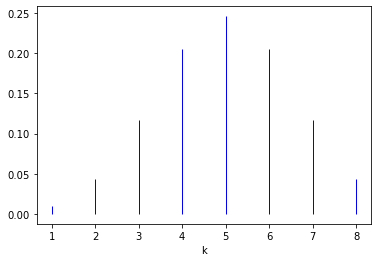

In [6]:
fig, ax = plt.subplots(1, 1)
ax.vlines(trials, 0, prob_success, colors='blue', linestyles='-', lw=1)
ax.set_xlabel('k')
plt.show()

In case n = 1 the binomial distribution is known as the Bernoulli distribution. 

We want to maximize the likelihood 

$$\mathscr{L}(w|x) = \prod_{i=1}^N \sigma(x_i)^{y_i} (1 - \sigma(x_i))^{1 - y_i}$$

It is easier to maximize its logarithm, that is the log-likelihood 

$$ log\mathscr{L}(w|x) = \sum_{i=1}^N [y_i log(\sigma(x_i)) + (1 - y_i)log(1 - \sigma(x_i))]$$

If we change the sign of the log-likelihood our goal will be to minimize $L(w|x) = -log\mathscr{L}(w|x)$

$$ L(w|x) = \sum_{i=1}^N [-y_i log(\sigma(x_i)) - (1 - y_i)log(1 - \sigma(x_i))]$$

We can see what is the contribution to the loss function of one single example in two cases, when y = 1 and when y = 0: we plot the loss in the two cases what is the loss for $\sigma(z) \in [0, 1]$

In [7]:
def loss_1(z):
    return - np.log(sigmoid(z))

def loss_0(z):
    return - np.log(1 - sigmoid(z))

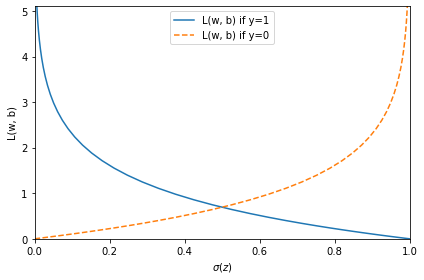

In [8]:
z = np.linspace(-10, 10, 100)
sigma_z = sigmoid(z)

c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label='L(w, b) if y=1')

c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label='L(w, b) if y=0')


plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\sigma(z)$')
plt.ylabel('L(w, b)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## The Iris data set
We will use the same Iris data set that we used for the Perceptron.

In [9]:
iris_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(iris_url, header=None, encoding='utf-8')
df[4].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Features selection
We copy the data from the Pandas dataframe to a NumPy array and then we select two features for the classification task: petal length and petal width

In [10]:
petal_length_col = 2
petal_width_col = 3
X = df.iloc[:, [petal_length_col, petal_width_col]].values # extract petal length and petal length
y = df.iloc[:, 4].values 
y = np.where(y == 'Iris-setosa', 0, y)
y = np.where(y == 'Iris-versicolor', 1, y)
y = np.where(y == 'Iris-virginica', 2, y)
y = y.astype(np.int64)
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


### Data partition
We split the data into a training set and a validation set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

### Data normalization
Finally we normalize the data. We apply a linear transformation the two subsets in order to be centered around their mean value and scaled by their standard deviation.

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Linear regression model
We could implement a linear regression model as a module (aka class or data structure) that provides a way to inject the hyperparameters such as the learning rate, the optimizer and the number of epochs, a method to train the model by fitting its parameters, and another method to compute the prediction given an input. Scikit-Learn offers an implementation of the logistic regression. The hyperparameters are the optimizer (solver), a regularization constant C and a flag to tell the algorithm that the data contains more than two classes (multinomial logistic regression). The higher the regularization constant the lower is its contribution to the loss function. A common way to use a binary regression model to classify a data set with more than two classes is the One-vs-Rest (ovr) technique in which the model is trained to classify one type of examples against all the others at a time. In our case the model is trained to classify the iris virginica against iris setosa and iris versicolor, then the iris setosa against iris virginica and iris versicolor and finaly the iris versicolor against the other two classes. 

In [13]:
from sklearn.linear_model import LogisticRegression

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, multi_class='ovr')

## Data visualization
We define a function to plot the data and show the linear separation between the three types of iris

In [14]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

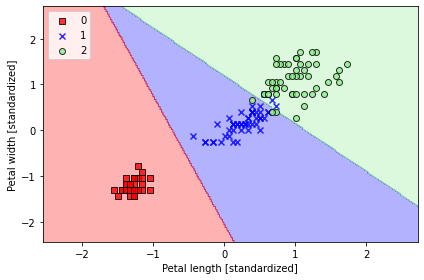

In [15]:
plot_decision_regions(X_combined_std, y_combined, classifier=lr)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [16]:
lr.predict_proba(X_test_std[:1, :])

array([[3.88198890e-09, 1.46859501e-01, 8.53140495e-01]])

## Regularization 
A model has high variance when it follows the training data points too closely and is not able to generalize well. High variance is a synonym of overfitting. The other side of the tradeoff is high bias, when a model is too rigid to be able to fit the dat. High bias is a synonym of underfitting. Regularization is a technique used to address the bias-variance tradeoff problem by adding a term to the cost function that keeps the weights small. L2 is the most used term for regularization 

$$L2 = \frac{1}{2}\lambda||w||^2$$

The cost function with the regularization component becomes

$$ \mathscr{L}(w|x) = L(w|x) + \frac{1}{2}\lambda||w||^2$$

so that when we use the optimization algorithm, following the gradient towards a minimum of the cost function, the weight update will be smaller

$$w_{i+1} = w_i − \gamma \nabla_w (L + \lambda ||w||^2)$$

We can plot the weights while changing the parameter $\lambda = \frac{1}{C}$

In [17]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)

As we can see the weights are kept small as long as the regularization parameter C is small and the regularization strong, and are bigger, positive and negative, when the regularization parameter C increases and the regularization term smaller.

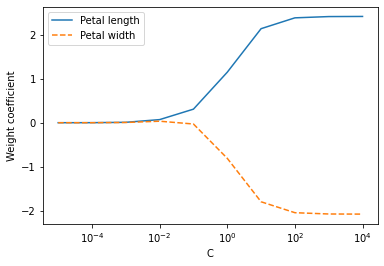

In [18]:
plt.plot(params, weights[:, 0], label='Petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='Petal width')
plt.ylabel('Weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()